# Overview

Here we have google share prices with open, high, low , close values for a particular day.
Using this data in our LSTM model we will predict the open prices for next 20 days.

Two files:
1. Training File
2. Test File

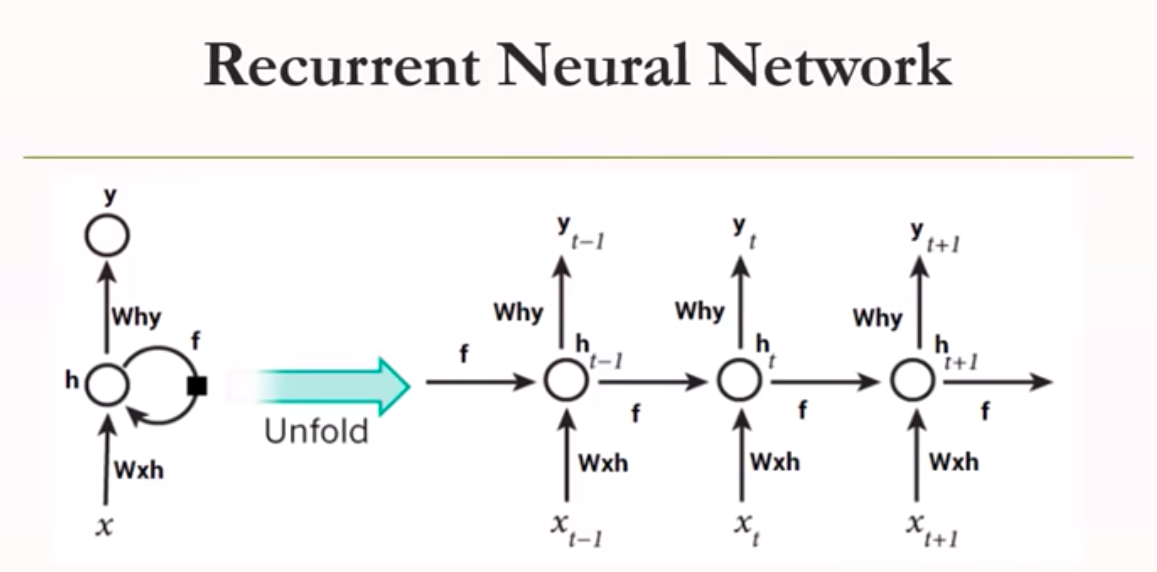

In [18]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
#Importing the data
train= pd.read_csv('Price_train.csv')
test= pd.read_csv('Price_test.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values


In [5]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [6]:
train_open_scaled[60]

array([0.08627874])

Below we will be taking previous 60 days open datasteps to predict the next values so we are converting the data as per our input in LTSM layers.
i.e for taking 0 to 59 days open price to get 60th day price as output, 1 to 60 for 61, 2 to 61 for 62

In [7]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [8]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [9]:
xtrain.shape

(1198, 60, 1)

### Building the LSTM Network

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

W0813 18:29:17.995656 4398065088 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 18:29:18.028707 4398065088 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 18:29:18.042162 4398065088 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 18:29:18.395432 4398065088 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 18:29:18.406625 4398065088 deprecati

Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0467
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [==============================] - 9s 8ms/step -

1198/1198 [==============================] - 9s 7ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014


### Predicting for test data

As we have 60 input in our layer, we will concatenate our train and test and will take last 60 values of our training set with test set

In [12]:

test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [13]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [14]:
xtest= np.array(xtest)

In [15]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

In [16]:
predicted_value= ss.inverse_transform(predicted_value)

### Plotting the data

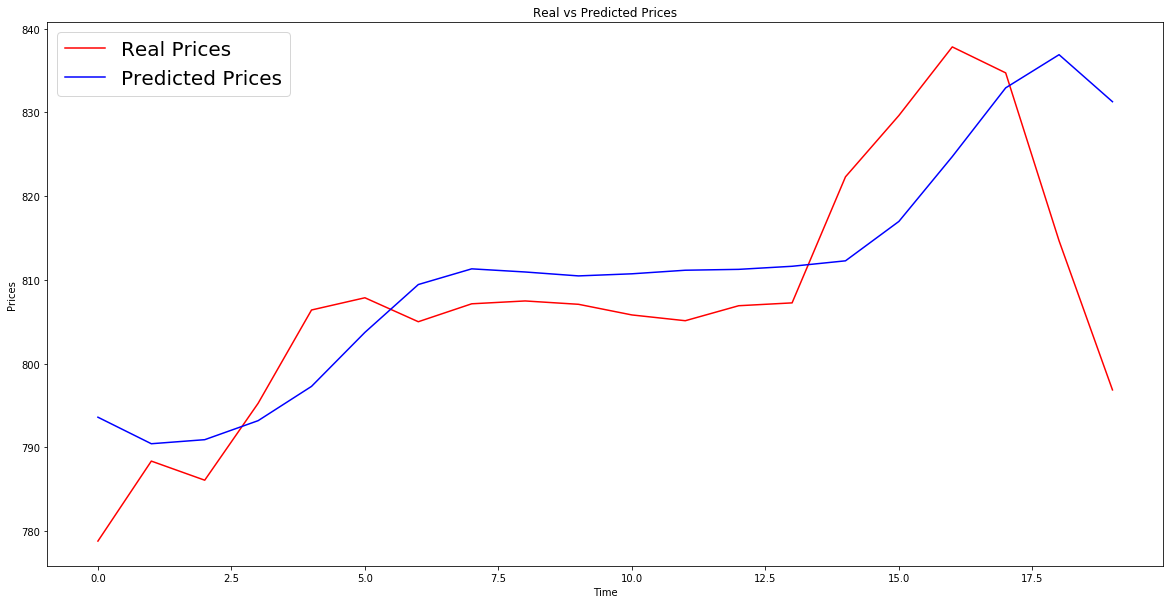

In [24]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)


In [25]:
from keras.wrappers.scikit_learn import KerasRegressor

In [28]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/25
798/798 [==============================] - 7s 9ms/step - loss: 0.1201
Epoch 2/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0244
Epoch 3/25
798/798 [==============================] - 4s 5ms/step - loss: 0.0204
Epoch 4/25
798/798 [==============================] - 4s 5ms/step - loss: 0.0196
Epoch 5/25
798/798 [==============================] - 3s 4ms/step - loss: 0.0199
Epoch 6/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0154
Epoch 7/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0136
Epoch 8/25
798/798 [==============================] - 4s 5ms/step - loss: 0.0177
Epoch 9/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0112
Epoch 10/25
798/798 [==============================] - 4s 5ms/step - loss: 0.0072
Epoch 11/25
798/798 [==============================] - 5s 6ms/step - loss: 0.0174
Epoch 12/25
798/798 [==============================] - 4s 5ms/step - loss: 0.0153
Epoch 13/25
798/798 [====

798/798 [==============================] - 5s 7ms/step - loss: 0.0224
Epoch 25/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0223
Epoch 26/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0219
Epoch 27/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0206
Epoch 28/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0212
Epoch 29/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0199
Epoch 30/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0189
Epoch 31/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0180
Epoch 32/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0167
Epoch 33/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0160
Epoch 34/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0156
Epoch 35/50
798/798 [==============================] - 5s 7ms/step - loss: 0.0148
Epoch 36/50
798/798 [=======

799/799 [==============================] - 5s 7ms/step - loss: 0.0077
Epoch 23/50
799/799 [==============================] - 5s 7ms/step - loss: 0.0066
Epoch 24/50
799/799 [==============================] - 6s 7ms/step - loss: 0.0053
Epoch 25/50
799/799 [==============================] - 6s 7ms/step - loss: 0.0045
Epoch 26/50
799/799 [==============================] - 5s 7ms/step - loss: 0.0041
Epoch 27/50
799/799 [==============================] - 5s 7ms/step - loss: 0.0037
Epoch 28/50
799/799 [==============================] - 6s 7ms/step - loss: 0.0034
Epoch 29/50
799/799 [==============================] - 6s 7ms/step - loss: 0.0030
Epoch 30/50
799/799 [==============================] - 5s 7ms/step - loss: 0.0028
Epoch 31/50
799/799 [==============================] - 6s 8ms/step - loss: 0.0027
Epoch 32/50
799/799 [==============================] - 6s 8ms/step - loss: 0.0027
Epoch 33/50
799/799 [==============================] - 7s 8ms/step - loss: 0.0028
Epoch 34/50
799/799 [=======

799/799 [==============================] - 4s 4ms/step - loss: 0.0227
Epoch 21/25
799/799 [==============================] - 3s 4ms/step - loss: 0.0220
Epoch 22/25
799/799 [==============================] - 4s 4ms/step - loss: 0.0203
Epoch 23/25
799/799 [==============================] - 4s 4ms/step - loss: 0.0205
Epoch 24/25
799/799 [==============================] - 4s 4ms/step - loss: 0.0191
Epoch 25/25
399/399 [==============================] - 2s 6ms/step
Epoch 1/25
798/798 [==============================] - 11s 13ms/step - loss: 0.0854
Epoch 2/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0218
Epoch 3/25
798/798 [==============================] - 3s 4ms/step - loss: 0.0217
Epoch 4/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0190
Epoch 5/25
798/798 [==============================] - 3s 4ms/step - loss: 0.0164
Epoch 6/25
798/798 [==============================] - 4s 4ms/step - loss: 0.0155
Epoch 7/25
798/798 [===========================

798/798 [==============================] - 5s 7ms/step - loss: 0.0204
Epoch 18/25
798/798 [==============================] - 5s 7ms/step - loss: 0.0193
Epoch 19/25
798/798 [==============================] - 5s 7ms/step - loss: 0.0191
Epoch 20/25
798/798 [==============================] - 5s 7ms/step - loss: 0.0181
Epoch 21/25
798/798 [==============================] - 6s 8ms/step - loss: 0.0174
Epoch 22/25
798/798 [==============================] - 7s 8ms/step - loss: 0.0160
Epoch 23/25
798/798 [==============================] - 6s 7ms/step - loss: 0.0153
Epoch 24/25
798/798 [==============================] - 6s 7ms/step - loss: 0.0132
Epoch 25/25
400/400 [==============================] - 3s 9ms/step
Epoch 1/25
799/799 [==============================] - 14s 18ms/step - loss: 0.1701
Epoch 2/25
799/799 [==============================] - 6s 7ms/step - loss: 0.0983
Epoch 3/25
799/799 [==============================] - 6s 7ms/step - loss: 0.0899
Epoch 4/25
799/799 [========================

In [35]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/25
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0461
Epoch 2/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0152
Epoch 3/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0135
Epoch 4/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0131
Epoch 5/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0105
Epoch 6/25
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0103
Epoch 7/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0089
Epoch 8/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0091
Epoch 9/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0083
Epoch 10/25
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0073
Epoch 11/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0078
Epoch 12/25
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0080

In [37]:
model

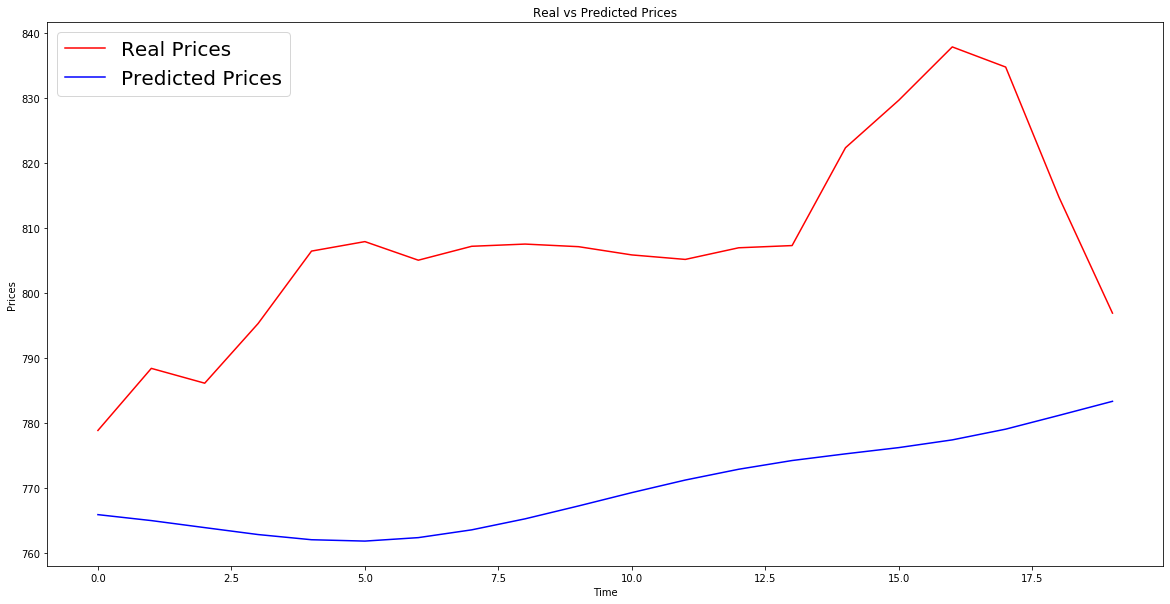

In [40]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
